# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(df["Mouse ID"].value_counts())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = df.loc[df.duplicated(subset =['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dupe_mouse)

['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = df.loc[df['Mouse ID']=='g989',:]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = df[df['Mouse ID'] == 'g989'].index
df.drop(index_names,inplace = True)

In [9]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].value_counts())

248

In [10]:
# just a handy list of column titles for future reference
list(df.columns)

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen = df.groupby('Drug Regimen')
regimen_mean = regimen['Tumor Volume (mm3)'].mean()
regimen_median = regimen['Tumor Volume (mm3)'].median()
regimen_var = regimen['Tumor Volume (mm3)'].var()
regimen_std = regimen['Tumor Volume (mm3)'].std()
regimen_sem = regimen['Tumor Volume (mm3)'].sem()

regimen_summary = pd.DataFrame({
    "mean": regimen_mean,
    "median": regimen_median,
    "var": regimen_var,
    "std": regimen_std,
    "sem": regimen_sem
})
regimen_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

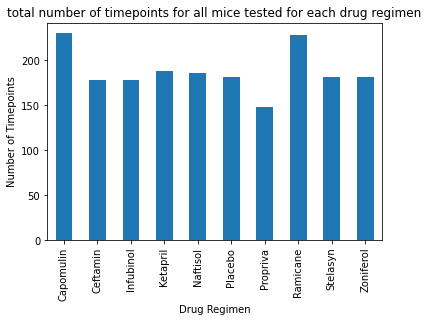

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = regimen['Timepoint'].count()
timepoints.plot.bar()

plt.title("total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



Text(0.5, 1.0, 'distribution of female versus male mice')

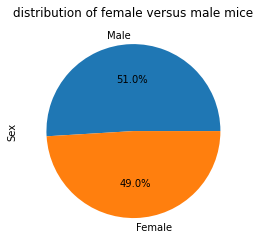

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = df['Sex'].value_counts()
sex.plot.pie(autopct="%1.1f%%")
plt.title("distribution of female versus male mice")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(df, last_time, how='right', on="Mouse ID")
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# for treatment in treatments:
#     if (new_df['Drug Regimen'] == treatment) & (new_df['Timepoint_x'] == new_df['Timepoint_y']):
#         tumor_vol_data.append(list(new_df['Tumor Volume (mm3)']))

# print(tumor_vol_data)  
                              
    # add subset
    
# subset = new_df.loc[new_df['Drug Regimen']==treatment]

    # Determine outliers using upper and lower bounds
    
quartiles = new_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr_1_5 = iqr * 1.5

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The interquartile * 1.5 range of tumor volumes is: {iqr_1_5}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - iqr_1_5
upper_bound = upperq + iqr_1_5
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The lower quartile of tumor volumes is: 45.0
The upper quartile of tumor volumes is: 56.32407510749999
The interquartile range of tumor volumes is: 11.324075107499993
The interquartile * 1.5 range of tumor volumes is: 16.98611266124999
The the median of tumor volumes is: 48.933453655 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


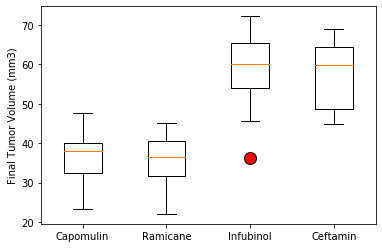

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

## Line and Scatter Plots

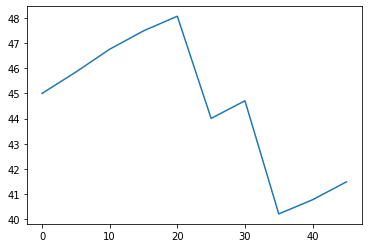

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_of_interest = new_df.loc[new_df['Mouse ID'] == 'l509',:]

plt.plot(mouse_of_interest['Timepoint_x'],mouse_of_interest['Tumor Volume (mm3)'])

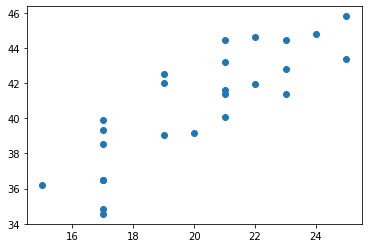

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = new_df.loc[new_df['Drug Regimen']=='Capomulin',:]

capomulin_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weight,capomulin_volume)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


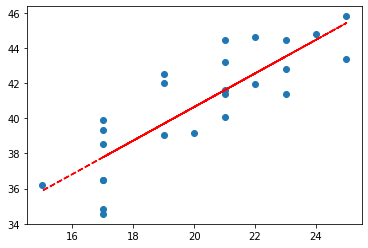

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(capomulin_weight,capomulin_volume)[0],2)}")

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(capomulin_weight, capomulin_volume)
cap_fit = cap_slope * capomulin_weight + cap_int
cap_fit

plt.scatter(capomulin_weight,capomulin_volume)
plt.plot(capomulin_weight,cap_fit,"--", color="red")
